# GTI770 - Systèmes Intelligents et Apprentissage Machine

#### Alessandro L. Koerich

### Notebook Jupyter - 6_Bayes_Regression 

#### May 2018


### This is our first notebook on REGRESSION, which, like classification, is a supervised learning task.


In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## We need to generate some data to play with...

## So, we need to choose a function of form $r = f(x)$ where $r$ is the output (label) and $x$ is the input (feature)

### Example of functions: 
$$r = x + 2$$
$$r = x^2 + 2x + 4$$
$$r = \sin(2\pi x)$$
$$r = \cos(6\pi x)$$
## or any other function of $x$ that you may want to play with.

## So, let's use this 2nd degree function: $$r = 0.5x^2-0.2x-0.03$$

In [18]:
# data function

def true_fun(X):
  return np.cos(6 * np.pi * X)

  # return 0.3*X*X*X+0.5*X*X-0.2*X-0.03

  # return 0.5*X*X-0.2*X-0.03



### So, using the function above, we will generate "training data"
### for example, 60 data points.

In [19]:
np.random.seed(0)
n_samples = 60

# Let's generate 60 random data points and compute the corresponding "label", that means "r" for each data point
X = 2*np.sort(np.random.rand(n_samples))

# Computing the corresponding "label", that means "r", for each generated data point in X 
r = true_fun(X)

# Let's add a random noise to our function
r = r + np.random.randn(n_samples) * 0.1


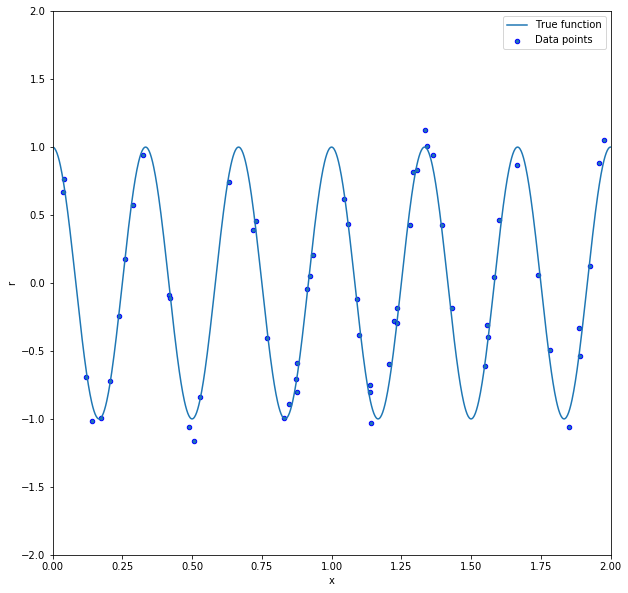

In [20]:
# Let's plot the data points...
# and also the function that we have used to generate them

plt.figure(figsize=(10, 10))
X_fake = np.linspace(0, 2, 1000) # Generate some "fake points" to allow us to draw the function.
plt.plot(X_fake, true_fun(X_fake), label="True function")
plt.scatter(X, r, edgecolor='b', s=20, label="Data points")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

In [21]:
# Split the dataset into train and test
# Using hold-out evaluation
from sklearn.model_selection import train_test_split

# 60% for training and 40% for validation
X_train, X_valid, r_train, r_valid = train_test_split( X, r, test_size=0.4, random_state=0, shuffle=True)


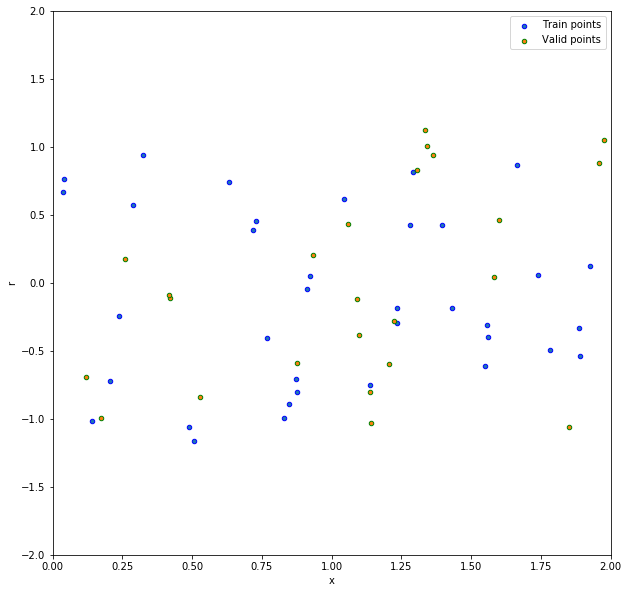

In [22]:
# Let's plot the train and test point
plt.figure(figsize=(10, 10))
plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Train points")
plt.scatter(X_valid, r_valid, edgecolor='g', s=20, label="Valid points")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

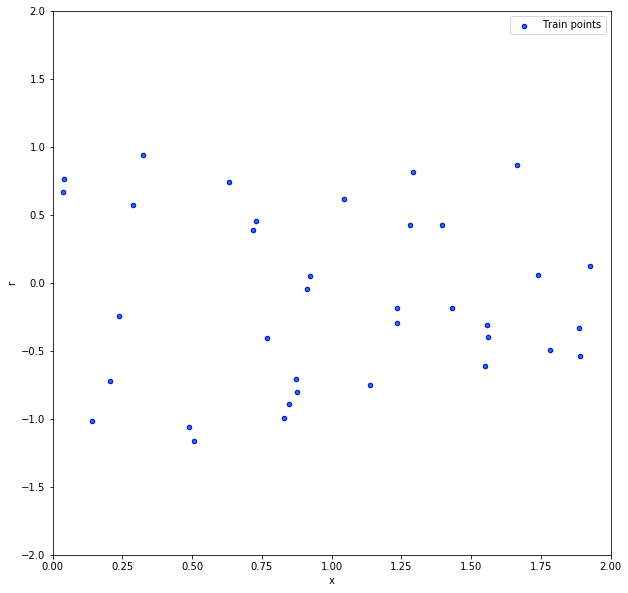

In [23]:
# Let's plot just the train points
plt.figure(figsize=(10, 10))
plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Train points")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

# Linear Regression


$$g(x^t|w_1,w_0)=w_1x^t+w_0$$


### Let's fit (learn) a linear regression model using the training datapoints



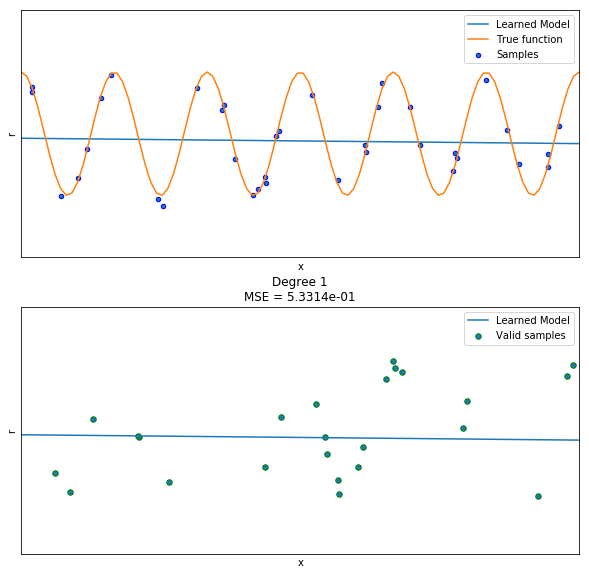

In [24]:
# Fit the model on the training points

degrees = 1

plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
plt.setp(ax, xticks=(), yticks=())
linear_regression = LinearRegression()
pipeline = Pipeline([("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

X_fake = np.linspace(0, 2, 100)
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.plot(X_fake, true_fun(X_fake), label="True function")
plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-2, 2))
plt.legend(loc="best")

ax = plt.subplot(2, 1, 2)
plt.setp(ax, xticks=(), yticks=())
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.scatter(X_valid, r_valid, edgecolor='g', s=30, label="Valid samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-2, 2))
plt.legend(loc="best")

y_pred = pipeline.predict(X_valid[:, np.newaxis])
mean_squared_error(r_valid, y_pred)
plt.title("Degree {}\nMSE = {:.4e}".format(degrees, mean_squared_error(r_valid, y_pred)))

plt.show()

### Conclusion? The linear model is too simple. 

### We need a more complex function: more degrees of freedom -> more parameters to adjust

# Polinomial Regression

### Degree 2: $$g(x^t|w_2,w_1,w_0)=w_2{(x^t)}^2+w_1x^t+w_0$$

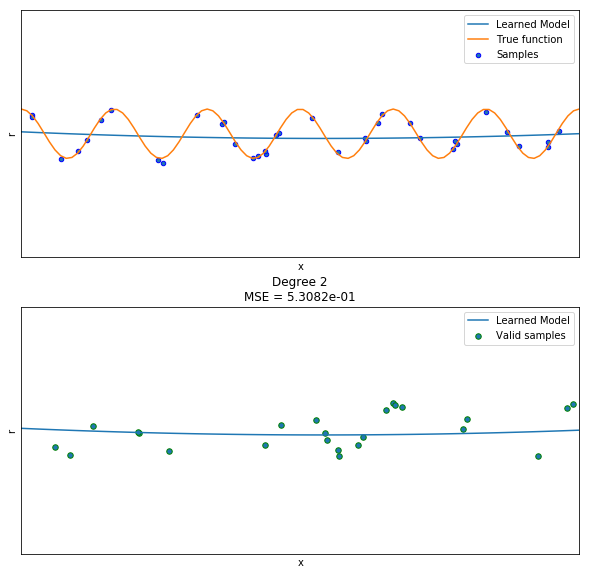

In [25]:
# Fit the model on the training points
degrees = 2

plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Fit the model on the training points
X_fake = np.linspace(0, 2, 100)
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.plot(X_fake, true_fun(X_fake), label="True function")
plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-5, 5))
plt.legend(loc="best")

ax = plt.subplot(2, 1, 2)
plt.setp(ax, xticks=(), yticks=())
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.scatter(X_valid, r_valid, edgecolor='g', s=30, label="Valid samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-5, 5))
plt.legend(loc="best")

y_pred = pipeline.predict(X_valid[:, np.newaxis])
mean_squared_error(r_valid, y_pred)
plt.title("Degree {}\nMSE = {:.4e}".format(degrees, mean_squared_error(r_valid, y_pred)))

plt.show()

### Degree 4: $$g(x^t|w_4,w_3,w_2,w_1,w_0)=w_4{(x^t)}^4+w_3{(x^t)}^3+w_2{(x^t)}^2+w_1x^t+w_0$$

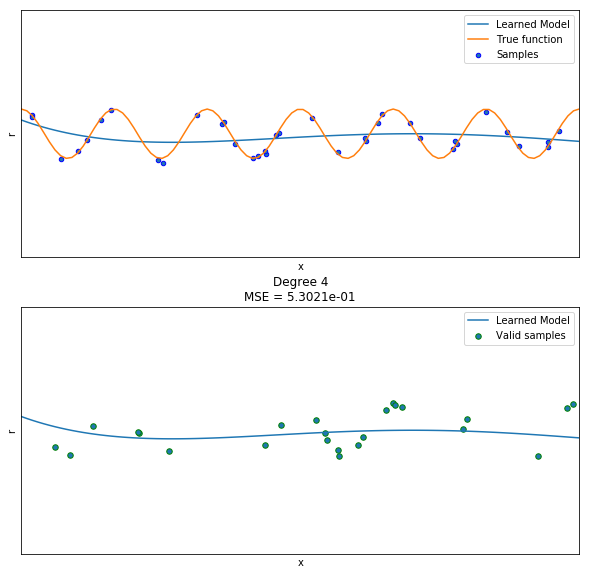

In [26]:
# Fit the model on the training points
degrees = 4

plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Fit the model on the training points
X_fake = np.linspace(0, 2, 100)
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.plot(X_fake, true_fun(X_fake), label="True function")
plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-5, 5))
plt.legend(loc="best")

ax = plt.subplot(2, 1, 2)
plt.setp(ax, xticks=(), yticks=())
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.scatter(X_valid, r_valid, edgecolor='g', s=30, label="Valid samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-5, 5))
plt.legend(loc="best")

y_pred = pipeline.predict(X_valid[:, np.newaxis])
mean_squared_error(r_valid, y_pred)
plt.title("Degree {}\nMSE = {:.4e}".format(degrees, mean_squared_error(r_valid, y_pred)))

plt.show()

## Degree 10

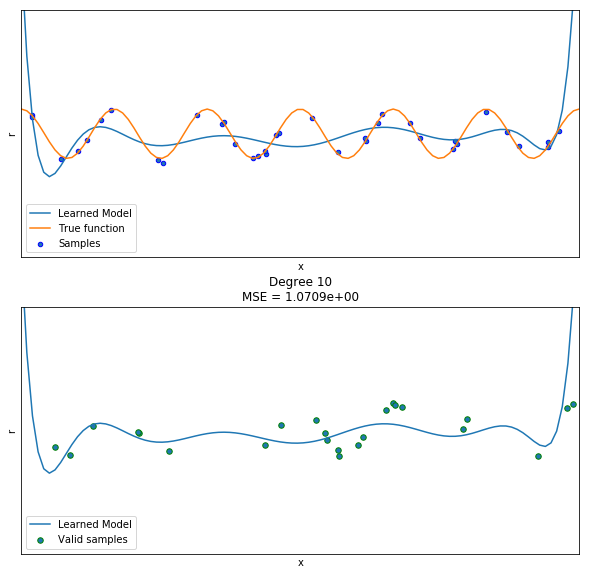

In [27]:
# Fit the model on the training points
degrees = 10

plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Fit the model on the training points
X_fake = np.linspace(0, 2, 100)
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.plot(X_fake, true_fun(X_fake), label="True function")
plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-5, 5))
plt.legend(loc="best")

ax = plt.subplot(2, 1, 2)
plt.setp(ax, xticks=(), yticks=())
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.scatter(X_valid, r_valid, edgecolor='g', s=30, label="Valid samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-5, 5))
plt.legend(loc="best")

y_pred = pipeline.predict(X_valid[:, np.newaxis])
mean_squared_error(r_valid, y_pred)
plt.title("Degree {}\nMSE = {:.4e}".format(degrees, mean_squared_error(r_valid, y_pred)))

plt.show()

## Degree 20

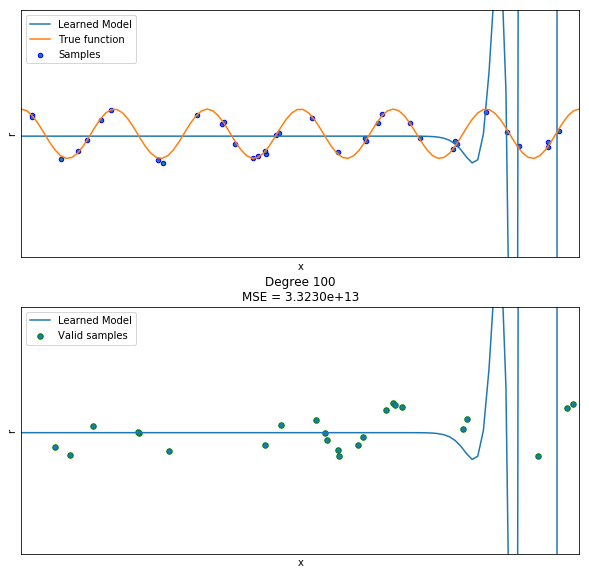

In [29]:
# Fit the model on the training points
degrees = 100

plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Fit the model on the training points
X_fake = np.linspace(0, 2, 100)
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.plot(X_fake, true_fun(X_fake), label="True function")
plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-5, 5))
plt.legend(loc="best")

ax = plt.subplot(2, 1, 2)
plt.setp(ax, xticks=(), yticks=())
plt.plot(X_fake, pipeline.predict(X_fake[:, np.newaxis]), label="Learned Model")
plt.scatter(X_valid, r_valid, edgecolor='g', s=30, label="Valid samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 2))
plt.ylim((-5, 5))
plt.legend(loc="best")

y_pred = pipeline.predict(X_valid[:, np.newaxis])
mean_squared_error(r_valid, y_pred)
plt.title("Degree {}\nMSE = {:.4e}".format(degrees, mean_squared_error(r_valid, y_pred)))

plt.show()

In [ ]:
print("Notebook ended")